In [1]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 23.7 MB/s eta 0:00:00


In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
import pickle

In [6]:
df = pd.read_csv("grocery_data.csv",header=None)

In [7]:
df.shape

(1000, 20)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#clean data
print(df.isna().sum())

0       0
1     214
2     393
3     528
4     636
5     737
6     807
7     854
8     904
9     940
10    965
11    983
12    992
13    997
14    999
15    999
16    999
17    999
18    999
19    999
dtype: int64


In [15]:
# Replace NaN with empty string
df = df.fillna("")

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
2,chutney,,,,,,,,,,,,,,,,,,,
3,turkey,avocado,,,,,,,,,,,,,,,,,,
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,


In [31]:
#bring rows_as_list from df
all_transactions_with_null_strings= df.values.tolist()

In [32]:
all_transactions_with_null_strings
#empty lists are still added

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['chutney',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['turkey',
  'avocado',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['low fat yogurt',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
 

In [33]:
# Convert to list of lists, skipping NaN and empty strings
all_transactions = [
    [val for val in row if pd.notna(val) and val != ""]
    for row in df.values.tolist()
]


In [ ]:
all_transactions
#now empty strings discarded

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [35]:
#Encoding dataset in boolean encoded vector
from mlxtend.preprocessing import TransactionEncoder
trans_encoder = TransactionEncoder() # Instantiate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)

In [ ]:
#Making data frame
trans_encoder_matrix_df = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

In [37]:
trans_encoder_matrix_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# Find frequent itemsets with at least 1% support (adjust as needed)

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
frequent_itemsets = fpgrowth(trans_encoder_matrix_df, min_support=0.01, use_colnames=True)

# Sort by support (most common first)
frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)

# Show top 10 frequent label patterns
print(frequent_itemsets.head(30))


     support                    itemsets
0      0.245             (mineral water)
16     0.207                      (eggs)
33     0.188                 (chocolate)
28     0.185                 (spaghetti)
23     0.159              (french fries)
1      0.141                 (green tea)
20     0.136                      (milk)
52     0.098               (ground beef)
29     0.095         (frozen vegetables)
45     0.084                  (pancakes)
2      0.083                    (shrimp)
3      0.083            (low fat yogurt)
53     0.082                  (escalope)
17     0.080                   (burgers)
19     0.079                    (turkey)
30     0.078                   (cookies)
57     0.076                      (cake)
4      0.076                 (olive oil)
25     0.073                      (soup)
54     0.068             (herb & pepper)
34     0.067                   (chicken)
5      0.062           (frozen smoothie)
144    0.060       (mineral water, eggs)
253    0.059  (m

In [39]:
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(list)

In [40]:
freq_item_df=pd.DataFrame(frequent_itemsets)
freq_item_df.to_csv("freq_item_resistant_04.csv",index=False)

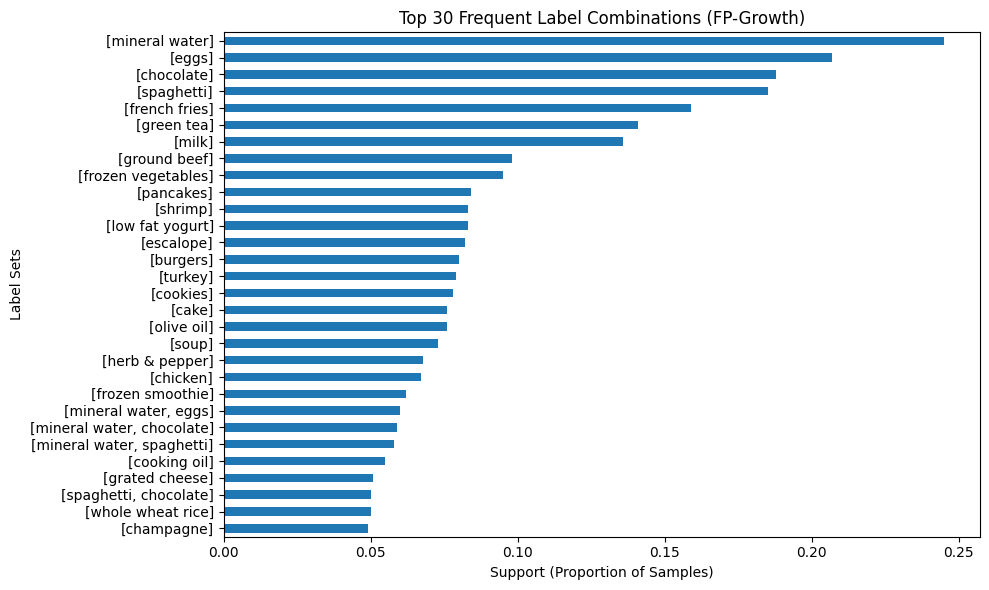

In [41]:
import matplotlib.pyplot as plt

top_n = 30
frequent_itemsets.head(top_n).plot(
    x='itemsets', y='support', kind='barh', figsize=(10, 6), legend=False)
plt.xlabel("Support (Proportion of Samples)")
plt.ylabel("Label Sets")
plt.title(f"Top {top_n} Frequent Label Combinations (FP-Growth)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [42]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(50))


            antecedents          consequents  support  confidence      lift
0       (mineral water)               (eggs)    0.060    0.244898  1.183082
1                (eggs)      (mineral water)    0.060    0.289855  1.183082
2       (mineral water)          (chocolate)    0.059    0.240816  1.280938
3           (chocolate)      (mineral water)    0.059    0.313830  1.280938
4       (mineral water)          (spaghetti)    0.058    0.236735  1.279647
5           (spaghetti)      (mineral water)    0.058    0.313514  1.279647
6           (chocolate)          (spaghetti)    0.050    0.265957  1.437608
7           (spaghetti)          (chocolate)    0.050    0.270270  1.437608
8                (milk)      (mineral water)    0.047    0.345588  1.410564
9       (mineral water)               (milk)    0.047    0.191837  1.410564
10               (milk)          (chocolate)    0.046    0.338235  1.799124
11          (chocolate)               (milk)    0.046    0.244681  1.799124
12          

In [ ]:
rules_df=pd.DataFrame(rules)
rules_df.to_csv("resist_freq_pattern_fp_01.csv",index=False)